**Olympic Games History**

*From 1896 to 2000.*

Dataset from Kaggle: https://www.kaggle.com/datasets/fearsomejockey/olympics-dataset-2020-tokyo-dataset 

Data Analysis made by Zsofia Kadler - https://github.com/zsofiaKad/AnalyticsPortfolio 

# Install libraries & load data

In [1]:
# Import libreries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [55]:
df = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Zsofia Data Analytics\\PowerBI\\Olympic data\\Olympic Historical data until 2020\\All Year Olympic Dataset (with 2020 Tokyo Olympics).csv")

In [56]:
df.head(5)

,Unnamed: 0,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,0,A Dijiang,M,24.0,China,1992 Summer,1992,Summer,Basketball,0
1,1,A Lamusi,M,23.0,China,2012 Summer,2012,Summer,Judo,0
2,2,Gunnar Nielsen Aaby,M,24.0,Denmark,1920 Summer,1920,Summer,Football,0
3,3,Edgar Lindenau Aabye,M,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,3
4,4,Christine Jacoba Aaftink,F,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,0


# Data cleaning & preparation

## Checking structure & columns 

In [57]:
# Check structure
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275643 entries, 0 to 275642
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  275643 non-null  int64  
 1   Name        275643 non-null  object 
 2   Sex         275643 non-null  object 
 3   Age         266169 non-null  float64
 4   Team        275643 non-null  object 
 5   Games       275643 non-null  object 
 6   Year        275643 non-null  int64  
 7   Season      275643 non-null  object 
 8   Sport       275643 non-null  object 
 9   Medal       275643 non-null  int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 21.0+ MB


(275643, 10)

In [58]:
# Drop 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [59]:
# Remove duplicates
df.drop_duplicates(inplace=True)
df.shape

(204872, 9)

In [60]:
# Check for missing values
missing_values = df.isnull().sum()
total_entries = df.shape[0]
missing_percentage = (missing_values / total_entries) * 100
print("Missing values per column:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

Missing values per column:
        Missing Values  Percentage
Name                 0    0.000000
Sex                  0    0.000000
Age               7098    3.464602
Team                 0    0.000000
Games                0    0.000000
Year                 0    0.000000
Season               0    0.000000
Sport                0    0.000000
Medal                0    0.000000


In [61]:
# Handle inconsistencies
df.rename(columns={'Sex': 'Gender'}, inplace=True)
df['Sex'] = df['Sex'].replace({'M': 'Male', 'F': 'Female'})

In [62]:
# Rename 'medal' column for clarity
medal_map = {3: 'Gold', 2: 'Silver', 1: 'Bronze', 0: 'None'}
df['Medal'] = df['Medal'].map(medal_map)

In [63]:
# Check 
df.head(5)

,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal
0,A Dijiang,Male,24.0,China,1992 Summer,1992,Summer,Basketball,None
1,A Lamusi,Male,23.0,China,2012 Summer,2012,Summer,Judo,None
2,Gunnar Nielsen Aaby,Male,24.0,Denmark,1920 Summer,1920,Summer,Football,None
3,Edgar Lindenau Aabye,Male,34.0,Denmark/Sweden,1900 Summer,1900,Summer,Tug-Of-War,Gold
4,Christine Jacoba Aaftink,Female,21.0,Netherlands,1988 Winter,1988,Winter,Speed Skating,None


In [64]:
# Check datatypes
df.dtypes # we don´t change the data tyepes as we will correct them later in PowerBI

Name       object
Sex        object
Age       float64
Team       object
Games      object
Year        int64
Season     object
Sport      object
Medal      object
dtype: object

## Deep Dive

In [65]:
# Display distinct values for each column
for column in df.columns:
    print(f"Distinct values in '{column}':")
    print(df[column].unique())
    print()

Distinct values in 'Name':
['A Dijiang' 'A Lamusi' 'Gunnar Nielsen Aaby' ... 'ZVINOWANDA Vimbai'
 'ZWOUKHI Fathi' 'ZYLKA Krzysztof']

Distinct values in 'Sex':
['Male' 'Female']

Distinct values in 'Age':
[24. 23. 34. 21. 25. 27. 31. 33. 18. 26. 22. 30. 32. 28. 54. 20. 17. 43.
 47. 29. 41. 45. 49. 53. 57. nan 19. 38. 35. 16. 37. 15. 42. 46. 40. 36.
 14. 39. 48. 52. 44. 55. 50. 71. 63. 51. 58. 13. 60. 75. 65. 56. 64. 68.
 84. 12. 72. 59. 61. 70. 74. 62. 67. 69. 73. 66. 11. 76. 88. 96. 80. 10.
 81. 77. 97.]

Distinct values in 'Team':
['China' 'Denmark' 'Denmark/Sweden' ... 'Virgin Islands, US'
 "Lao People's Democratic Republic" 'Faroe Islands']

Distinct values in 'Games':
['1992 Summer' '2012 Summer' '1920 Summer' '1900 Summer' '1988 Winter'
 '1992 Winter' '1994 Winter' '1932 Summer' '2002 Winter' '1952 Summer'
 '1980 Winter' '2000 Summer' '1996 Summer' '1912 Summer' '1924 Summer'
 '2014 Winter' '1948 Summer' '1998 Winter' '2006 Winter' '2008 Summer'
 '2016 Summer' '2004 Summer' '1960

### Team / Country

In [66]:
# Get the total number of distinct values in the 'Team' column
total_distinct_teams = df['Team'].nunique()
print(f"Total number of distinct values in 'Team': {total_distinct_teams}")

Total number of distinct values in 'Team': 1203


In [ ]:
# Assuming df is your DataFrame
unique_teams = df['Team'].unique()

# Display all unique values
for team in unique_teams:
    print(team)

#### Note 1

These are too many distinct values to create manual a country column. I will use another dataset whit the Olympic data until Rio 2016. And use this information to my Country column. 

In [85]:
# Read the earlier Olympic data CSV file - until 2016.
old_data = pd.read_csv("C:\\Users\\Usuario\\Downloads\\archive (1)\\athlete_events.csv")

# Extract the Team and Country columns
team_country_guide = old_data[['Team', 'NOC']].drop_duplicates()

# Display the first few rows of the guide DataFrame
print(team_country_guide.head(10))

              Team  NOC
0            China  CHN
2          Denmark  DEN
3   Denmark/Sweden  DEN
4      Netherlands  NED
10   United States  USA
28         Finland  FIN
59          Norway  NOR
80         Romania  ROU
94         Estonia  EST
98          France  FRA


In [87]:
# Get the total number of distinct values in the 'Team' column
team_country_guide_unique = df['Team'].nunique()
print(f"Total number of distinct values in 'Team': {team_country_guide_unique}")

Total number of distinct values in 'Team': 1203


#### Note 2

It seems to be okay. Now we will create a dictionary with this data and create a Country column with the 3-Letter Code.

In [88]:
new_data = df.copy()

In [91]:
# Create a dictionary to map teams to countries
team_to_country = dict(zip(old_data['Team'], old_data['NOC']))

# Add the 'Country' column to the new_data DataFrame using the mapping
new_data['Country'] = new_data['Team'].map(team_to_country)

new_data.head(3)

,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal,Country
0,A Dijiang,Male,24.0,China,1992 Summer,1992,Summer,Basketball,None,CHN
1,A Lamusi,Male,23.0,China,2012 Summer,2012,Summer,Judo,None,CHN
2,Gunnar Nielsen Aaby,Male,24.0,Denmark,1920 Summer,1920,Summer,Football,None,DEN


In [95]:
# Count the unique values in the Country column
unique_country_count = new_data['Country'].nunique()

# Get all unique values in the Country column
unique_countries = new_data['Country'].unique()

# Display the count of unique values
print(unique_country_count)

# Display all unique values
print(unique_countries)

230
['CHN' 'DEN' 'NED' 'USA' 'FIN' 'NOR' 'ROU' 'EST' 'FRA' 'URS' 'MAR' 'ESP'
 'EGY' 'IRI' 'BUL' 'ITA' 'CHA' 'AZE' 'SUD' 'RUS' 'ARG' 'CUB' 'BLR' 'GRE'
 'CMR' 'TUR' 'CHI' 'MEX' 'NCA' 'HUN' 'NGR' 'ALG' 'KUW' 'BRN' 'PAK' 'IRQ'
 'UAR' 'LIB' 'QAT' 'MAS' 'GER' 'CAN' 'IRL' 'AUS' 'RSA' 'ERI' 'TAN' 'JOR'
 'TUN' 'LBA' 'BEL' 'DJI' 'PLE' 'COM' 'KAZ' 'BRU' 'IND' 'KSA' 'SYR' 'MDV'
 'ETH' 'UAE' 'YAR' 'INA' 'PHI' 'SGP' 'UZB' 'KGZ' 'TJK' 'EUN' 'JPN' 'CGO'
 'SUI' 'BRA' 'FRG' 'GDR' 'MON' 'ISR' 'URU' 'SWE' 'ISV' 'SRI' 'ARM' 'CIV'
 'KEN' 'BEN' 'UKR' 'GBR' 'GHA' 'SOM' 'LAT' 'NIG' 'MLI' 'AFG' 'POL' 'CRC'
 'PAN' 'GEO' 'SLO' 'CRO' 'GUY' 'NZL' 'POR' 'PAR' 'ANG' 'VEN' 'COL' 'BAN'
 'PER' 'ESA' 'PUR' 'UGA' 'HON' 'ECU' 'TKM' 'MRI' 'SEY' 'TCH' 'LUX' 'MTN'
 'CZE' 'SKN' 'TTO' 'DOM' 'VIN' 'JAM' 'LBR' 'SUR' 'NEP' 'MGL' 'AUT' 'PLW'
 'LTU' 'TOG' 'NAM' 'AHO' 'ISL' 'ASA' 'SAM' 'RWA' 'DMA' 'HAI' 'MLT' 'CYP'
 'GUI' 'BIZ' 'YMD' 'KOR' 'THA' 'BER' 'ANZ' 'SCG' 'SLE' 'PNG' 'YEM' 'IOA'
 'OMA' 'FIJ' 'VAN' 'MDA' 'YUG' 'BAH' 'GUA' 'SRB

In [96]:
# Check for NaN values in the Country column
nan_rows = new_data[new_data['Country'].isna()]

# Count the number of rows with NaN values in the Country column
nan_count = nan_rows.shape[0]

# Display the count of rows with NaN values and the rows themselves
print(f"Number of rows with NaN values in the Country column: {nan_count}")
print(nan_rows)

Number of rows with NaN values in the Country column: 948
                        Name     Sex   Age                        Team  \
271132           ABDI Hassan    Male  35.0    Islamic Republic of Iran   
271147  ABRAHAMS David Henry    Male  19.0    United States of America   
271169         ADONINA Daria  Female  18.0                         RPC   
271173          AFROOZ Saeid    Male  30.0    Islamic Republic of Iran   
271182       AHMADI Amirreza    Male  20.0    Islamic Republic of Iran   
...                      ...     ...   ...                         ...   
275626          ZOU Liankang    Male  25.0  People's Republic of China   
275627            ZOU Lihong  Female  37.0  People's Republic of China   
275628            ZOU Lijuan  Female  26.0  People's Republic of China   
275636         ZUMMO Bethany  Female  28.0    United States of America   
275639      ZURBRUGG Lindsey  Female  22.0    United States of America   

              Games  Year  Season                  Sp

In [97]:
# Count the unique values in the Team column of the nan_rows DataFrame
unique_teams_nan_rows = nan_rows['Team'].nunique()

# Display the count of unique values in the Team column of the nan_rows DataFrame
print(f"Number of unique values in the Team column of nan_rows: {unique_teams_nan_rows}")

Number of unique values in the Team column of nan_rows: 19


#### Note 3

Great. There are only 19 unique values in Teams where the Country is NaN. We will replace it manually to have all the data correct.

In [99]:
# Display the unique values in the Team column of the nan_rows DataFrame
unique_teams_nan_rows = nan_rows['Team'].unique()

unique_teams_nan_rows

array(['Islamic Republic of Iran', 'United States of America', 'RPC',
       "People's Republic of China", 'Refugee Paralympic Team',
       'Syrian Arab Republic', "Côte d'Ivoire", 'Republic of Korea',
       'Guinea-Bissau', 'Republic of Moldova', 'Hong Kong, China',
       'St Vincent and the Grenadines', 'Congo',
       'Democratic Republic of the Congo', 'United Republic of Tanzania',
       'North Macedonia', 'Virgin Islands, US',
       "Lao People's Democratic Republic", 'Faroe Islands'], dtype=object)

In [101]:
# Dictionary with the 3-letter country codes
country_codes2 = {
    'Islamic Republic of Iran': 'IRN',
    'United States of America': 'USA',
    'RPC': 'RPC',
    "People's Republic of China": 'CHN',
    'Refugee Paralympic Team': 'RPT',
    'Syrian Arab Republic': 'SYR',
    "Côte d'Ivoire": 'CIV',
    'Republic of Korea': 'KOR',
    'Guinea-Bissau': 'GBS',
    'Republic of Moldova': 'MDA',
    'Hong Kong, China': 'HKG',
    'St Vincent and the Grenadines': 'VIN',
    'Congo': 'COD',
    'Democratic Republic of the Congo': 'COD',
    'United Republic of Tanzania': 'TZA',
    'North Macedonia': 'MKD',
    'Virgin Islands, US': 'ISV',
    "Lao People's Democratic Republic": 'LAO',
    'Faroe Islands': 'DNK'
}

# Fill in the NaN values in the Country column with the corresponding country codes
new_data['Country'] = new_data['Country'].fillna(new_data['Team'].map(country_codes2))

In [104]:
#Double check
# Count the number of rows with NaN values in the Country column
nan_count = nan_rows.shape[0]
# Display 
print(f"Number of rows with NaN values in the Country column: {nan_count}")


Number of rows with NaN values in the Country column: 0


### Sport

In [105]:
df = new_data.copy()

In [109]:
# Count the unique values in the Sport column
unique_sports_count = df['Sport'].nunique()

# Display the count of unique values
print(f"Number of unique values in the Sport column: {unique_sports_count}")

# Display the unique values in the Sport column
print(df['Sport'].unique())

Number of unique values in the Sport column: 79
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Table Tennis' 'Nordic Combined' 'Baseball'
 'Rhythmic Gymnastics' 'Freestyle Skiing' 'Rugby Sevens' 'Trampolining'
 'Beach Volleyball' 'Triathlon' 'Ski Jumping' 'Curling' 'Snowboarding'
 'Rugby' 'Short Track Speed Skating' 'Skeleton' 'Lacrosse' 'Polo'
 'Cricket' 'Racquets' 'Motorboating' 'Military Ski Patrol' 'Croquet'
 'Jeu De Paume' 'Roque' 'Alpinism' 'Basque Pelota' 'Aeronautics'
 'Wheelchair Basketball' 'Sitting Volleyball' 'Powerlifting'
 'Canoe 

#### Note 4

As of the latest updates, there are 35 sports in the Summer Olympics and 8 sports in the Winter Olympics. Some sports in the list, like Tug-Of-War and Croquet, were part of the Olympics in the past but are no longer included. Others are part of the Paralympic Games.

**Current Olympic Sports**
- **Summer Olympics**: Basketball, Judo, Football, Athletics, Swimming, Badminton, Sailing, Gymnastics, Handball, Weightlifting, Wrestling, Water Polo, Rowing, Fencing, Equestrian, Shooting, Boxing, Taekwondo, Cycling, Diving, Canoeing, Tennis, Modern Pentathlon, Golf, Archery, Volleyball, Table Tennis, Triathlon, Rugby Sevens, Beach Volleyball, Skateboarding, Sport Climbing, Surfing, Breaking (Breakdancing).
- **Winter Olympics**: Speed Skating, Cross Country Skiing, Ice Hockey, Biathlon, Alpine Skiing, Luge, Bobsleigh, Figure Skating, Freestyle Skiing, Nordic Combined, Ski Jumping, Curling, Snowboarding, Short Track Speed Skating, Skeleton.

**Historical Olympic Sports**
- Tug-Of-War, Art Competitions, Polo, Cricket, Racquets, Motorboating, Military Ski Patrol, Croquet, Jeu De Paume, Roque, Alpinism, Basque Pelota, Aeronautics.

**Paralympic Sports**
- Wheelchair Basketball, Sitting Volleyball, Powerlifting, Wheelchair Fencing, Boccia, Goalball, Wheelchair Tennis, Wheelchair Rugby, Football 5-a-side.

Counting these options, 79 unique values seem to be correct.

# Create a csv

In [111]:
# Save the DataFrame to a CSV file
df.to_csv('olympic_dataset_1986_2020.csv', index=False)

# Data Analysis

In [112]:
df = pd.read_csv("C:\\Users\\Usuario\\OneDrive\\Documentos\\Zsofia Data Analytics\\PowerBI\\Olympic data\\olympic_dataset_1986_2020.csv")

In [113]:
df.head(2)

,Name,Sex,Age,Team,Games,Year,Season,Sport,Medal,Country
0,A Dijiang,Male,24.0,China,1992 Summer,1992,Summer,Basketball,NaN,CHN
1,A Lamusi,Male,23.0,China,2012 Summer,2012,Summer,Judo,NaN,CHN


In [117]:
# Percentage of Male to Female participants
gender_counts = df['Gender'].value_counts(normalize=True) * 100
print("Percentage of Male to Female participants:\n", gender_counts)

Percentage of Male to Female participants:
 Gender
Male      73.399488
Female    26.600512
Name: proportion, dtype: float64


In [123]:
# Relationship between Gender and Number of Medals won
medal_counts_by_gender = df[df['Medal'].notna()].groupby('Gender')['Medal'].count()
medal_percentage_by_gender = (medal_counts_by_gender / medal_counts_by_gender.sum()) * 100

print("Medals won by each gender:\n", medal_counts_by_gender)
print("------------------")
print("Percentage of medals won by each gender:\n", medal_percentage_by_gender)

Medals won by each gender:
 Gender
Female    11229
Male      28094
Name: Medal, dtype: int64
------------------
Percentage of medals won by each gender:
 Gender
Female    28.555807
Male      71.444193
Name: Medal, dtype: float64


In [119]:
# Minimum, Maximum, and Average Age of Participants
age_stats = df['Age'].agg(['min', 'max', 'mean'])
print("Age statistics:\n", age_stats)

Age statistics:
 min     10.00000
max     97.00000
mean    25.94384
Name: Age, dtype: float64


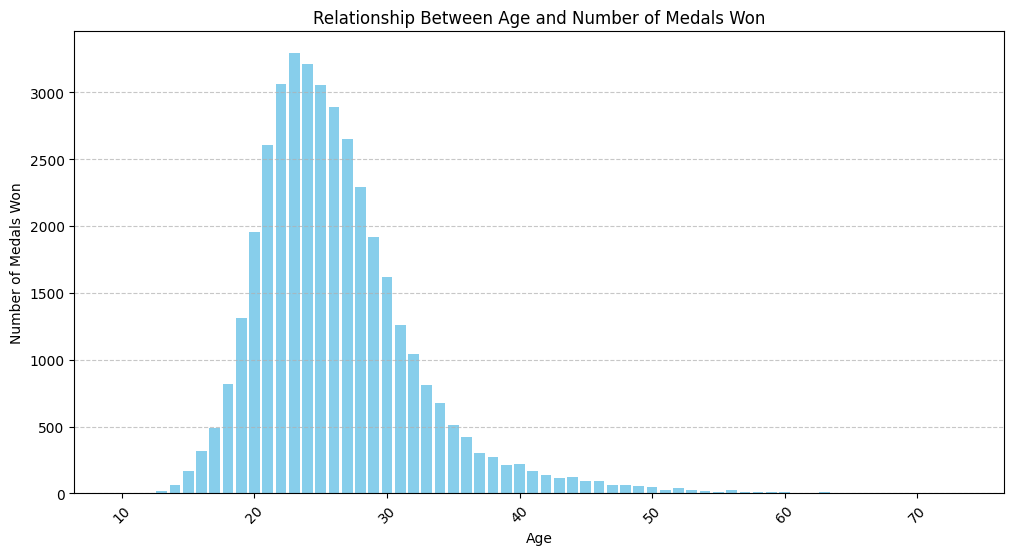

In [124]:
import matplotlib.pyplot as plt

# Relationship between Age and Number of Medals won
age_medal_relationship = df[df['Medal'].notna()].groupby('Age')['Medal'].count()

# Visualization
plt.figure(figsize=(12, 6))
plt.bar(age_medal_relationship.index, age_medal_relationship.values, color='skyblue')
plt.xlabel("Age")
plt.ylabel("Number of Medals Won")
plt.title("Relationship Between Age and Number of Medals Won")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [128]:
# Top 3 countries with the highest number of Medals
top_medal_countries = df[df['Medal'].notna()].groupby('Country')['Medal'].count().nlargest(3)

print("Top 3 countries with the highest number of medals:\n", top_medal_countries)

Top 3 countries with the highest number of medals:
 Country
USA    5268
URS    2338
GBR    2097
Name: Medal, dtype: int64


In [131]:
# Top 3 countries with the highest number of each medal type
top_gold_countries = df[df['Medal'] == 'Gold'].groupby('Country')['Medal'].count().nlargest(3)
top_silver_countries = df[df['Medal'] == 'Silver'].groupby('Country')['Medal'].count().nlargest(3)
top_bronze_countries = df[df['Medal'] == 'Bronze'].groupby('Country')['Medal'].count().nlargest(3)

print("Top 3 countries with the highest *Gold* medals:\n", top_gold_countries)
print("------------------")
print("\nTop 3 countries with the highest *Silver* medals:\n", top_silver_countries)
print("------------------")
print("\nTop 3 countries with the highest *Bronze* medals:\n", top_bronze_countries)

Top 3 countries with the highest *Gold* medals:
 Country
USA    2322
URS     994
GER     706
Name: Medal, dtype: int64
------------------

Top 3 countries with the highest *Silver* medals:
 Country
USA    1609
GBR     729
URS     686
Name: Medal, dtype: int64
------------------

Top 3 countries with the highest *Bronze* medals:
 Country
USA    1337
GER     730
FRA     680
Name: Medal, dtype: int64


In [134]:
# Total medals by sport across all countries
medal_by_sport = df[df['Medal'].notna()].groupby('Sport')['Medal'].count().reset_index()

# Sort by the total number of medals and select the top 10
top_10_sports = medal_by_sport.sort_values(by='Medal', ascending=False).head(10)

print("Top 10 sports with the highest number of medals:\n", top_10_sports)


Top 10 sports with the highest number of medals:
          Sport  Medal
5    Athletics   4123
51      Rowing   2951
63    Swimming   2788
34  Gymnastics   1909
27     Fencing   1621
29    Football   1571
37  Ice Hockey   1530
36      Hockey   1527
78   Wrestling   1290
54     Sailing   1218


In [139]:
# Filter for gold, silver, and bronze medals
gold_medals = df[df['Medal'] == 'Gold']
silver_medals = df[df['Medal'] == 'Silver']
bronze_medals = df[df['Medal'] == 'Bronze']

# Count the number of medals by sport for each type
gold_medals_by_sport = gold_medals.groupby('Sport')['Medal'].count().reset_index()
silver_medals_by_sport = silver_medals.groupby('Sport')['Medal'].count().reset_index()
bronze_medals_by_sport = bronze_medals.groupby('Sport')['Medal'].count().reset_index()

# Sort and get the top 5 sports for each medal type
top_5_gold = gold_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)
top_5_silver = silver_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)
top_5_bronze = bronze_medals_by_sport.sort_values(by='Medal', ascending=False).head(5)

# Print the results
print("Top 5 sports with the highest number of *Gold* medals:\n", top_5_gold)
print("------------------")
print("\nTop 5 sports with the highest number of *Silver* medals:\n", top_5_silver)
print("------------------")
print("\nTop 5 sports with the highest number of *Bronze* medals:\n", top_5_bronze)

Top 5 sports with the highest number of *Gold* medals:
          Sport  Medal
5    Athletics   1329
51      Rowing    971
63    Swimming    905
34  Gymnastics    623
27     Fencing    531
------------------

Top 5 sports with the highest number of *Silver* medals:
          Sport  Medal
3    Athletics   1410
47      Rowing    983
59    Swimming    943
31  Gymnastics    642
24     Fencing    555
------------------

Top 5 sports with the highest number of *Bronze* medals:
          Sport  Medal
3    Athletics   1384
46      Rowing    997
58    Swimming    940
30  Gymnastics    644
25    Football    543


In [144]:
# Participant with the highest number of medals
top_medalist = df[df['Medal'].notna()].groupby('Name')['Medal'].count().idxmax()

# Filter the dataset for the top medalist
top_medalist_data = df[(df['Name'] == top_medalist) & (df['Medal'].notna())]

# Count the total number of medals for the top medalist
total_medals = top_medalist_data['Medal'].count()

# Get the list of years the top medalist won
years_won = top_medalist_data['Year'].unique()

# Get the country of the top medalist (assuming the country is consistent)
country = top_medalist_data['Country'].iloc[0]

# Get the sports the top medalist participated in
sports = top_medalist_data['Sport'].unique()

print(f"Participant with the highest number of medals: {top_medalist}")
print(f"Country: {country}")
print(f"Sports: {', '.join(sports)}")
print(f"Total number of medals: {total_medals}")
print(f"Years won: {sorted(years_won)}")

Participant with the highest number of medals: Birgit Fischer-Schmidt
Country: GDR
Sports: Canoeing
Total number of medals: 10
Years won: [1980, 1988, 1992, 1996, 2000, 2004]


In [145]:
# Participant with the highest number of Gold Medals
top_gold_medalist = df[df['Medal'] == 'Gold'].groupby('Name')['Medal'].count().idxmax()

# Filter the dataset for the top gold medalist
top_gold_medalist_data = df[(df['Name'] == top_gold_medalist) & (df['Medal'] == 'Gold')]

# Count the total number of Gold medals for the top gold medalist
total_gold_medals = top_gold_medalist_data['Medal'].count()

# Get the list of years the top gold medalist won Gold medals
years_gold_won = top_gold_medalist_data['Year'].unique()

# Get the country of the top gold medalist (assuming the country is consistent)
country_gold = top_gold_medalist_data['Country'].iloc[0]

# Get the sports the top gold medalist participated in
sports_gold = top_gold_medalist_data['Sport'].unique()

print(f"Participant with the highest number of Gold medals: {top_gold_medalist}")
print(f"Country: {country_gold}")
print(f"Sports: {', '.join(sports_gold)}")
print(f"Total number of Gold medals: {total_gold_medals}")
print(f"Years won Gold medals: {sorted(years_gold_won)}")

Participant with the highest number of Gold medals: Aladr Gerevich (-Gerei)
Country: HUN
Sports: Fencing
Total number of Gold medals: 6
Years won Gold medals: [1932, 1936, 1948, 1952, 1956, 1960]


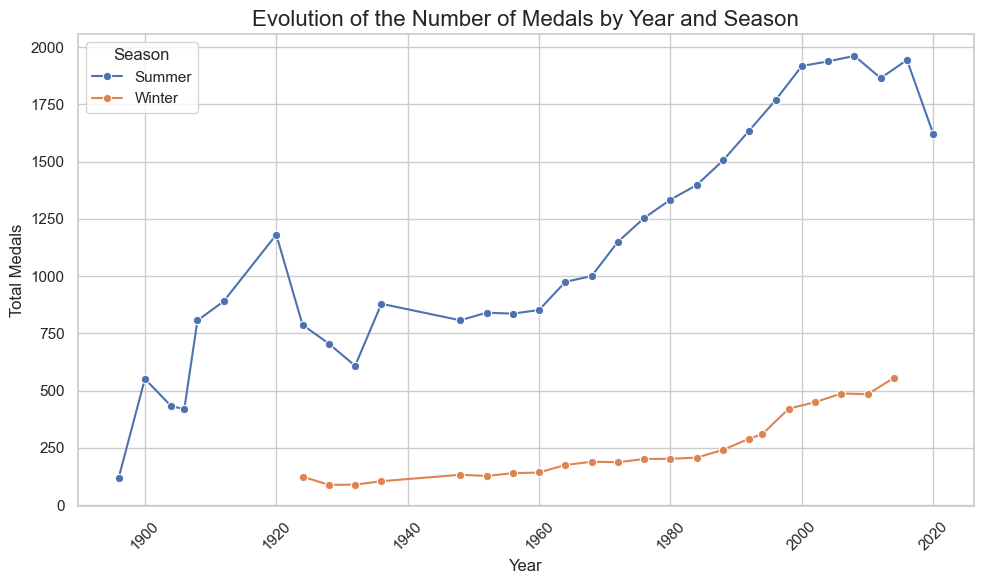

In [146]:
#Evolution of the Number od Medals by Year and Season

import seaborn as sns
import matplotlib.pyplot as plt

# Group the data by Year and Season, counting the number of medals
medals_by_year_season = df[df['Medal'].notna()].groupby(['Year', 'Season'])['Medal'].count().reset_index()

# Rename the columns for clarity
medals_by_year_season.columns = ['Year', 'Season', 'Total Medals']

# Set up the seaborn style
sns.set(style="whitegrid")

# Create a line plot or bar plot for the evolution of the number of medals by Year and Season
plt.figure(figsize=(10, 6))
sns.lineplot(data=medals_by_year_season, x='Year', y='Total Medals', hue='Season', marker='o')

# Add title and labels
plt.title('Evolution of the Number of Medals by Year and Season', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Medals', fontsize=12)

# Display the plot
plt.legend(title='Season')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()
